## Prototype

The Prototype design pattern is good for when creating new objects requires more resources than you want to use or have available. You can save resources by just creating a **copy** of any existing object that is already in memory.<br><br>

E.g., A file you've downloaded from a server may be large, but since it is already in memory, you could just clone it, and work on the new copy independently of the original.<br><br>

In the Prototype patterns interface, you create a **"static clone method"** that should be implemented by all classes that use the interface. How the clone method is implemented in the concrete class is up to you. You will need to decide whether a shallow or deep copy is required.<br><br>

### New concept
In Python, you have mutable objects such as Lists, Dictionaries, Sets  and any custom Objects. A Shallow copy will create new copies of the objects with new references in memory but the underlying data will point to the same memory location as the original list/object being copied. So changing any elements of a copied list will also affect the original list.

### Terminology
- Prototype Interface: The interface that describes the clone() method.
- Prototype: The Object/Product that implements the Prototype interface.
- Client: The client application that uses and creates the ProtoType.

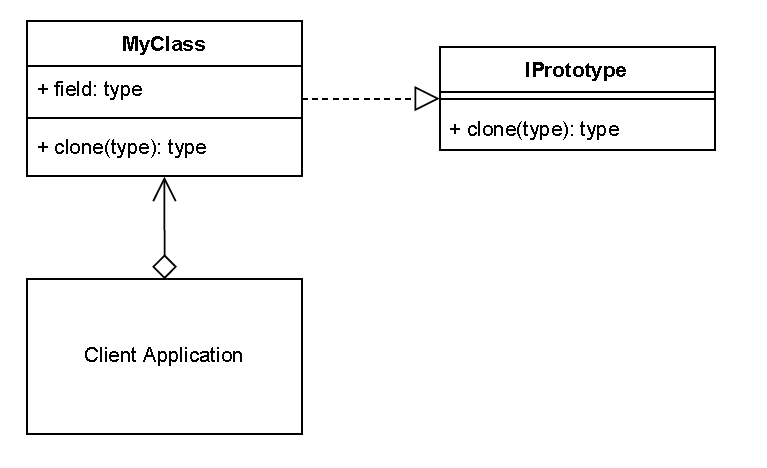

In [1]:
from PIL import Image
Image.open("../prototype.png")

### Source Code

In [9]:
#./prototype/prototype_concept.py

from abc import ABC, abstractmethod

class IProtoType(ABC):
    "Interface with clone method"
    @staticmethod
    @abstractmethod
    def clone():
        """The clone, deep or shallow.
        It's up ti you how you want to implement the details in
        your concrete class.
    """

class MyClass(IProtoType):
    "A Concrete Class"
    def __init__(self,field):
        self.field = field #any value of any type
        
    def clone(self):
        # This clone method uses a shallow copy technique
        return type(self)(self.field.copy())
            
            #type(self)(self.field) 
            # Shallow copy is returned .
            # "self.field.copy()" is also a shallow copy but has also copied the first level of field.
            # So it's essentially a shallow copy but 2 levels deep.  
        
        
    def __str__(self):
        return f"{id(self)}\tfield={self.field}\ttype={type(self.field)}"

In [10]:
OBJECT1=MyClass([1,2,3,4]) # Create the object
print(f"OBJECT1 {OBJECT1}")

OBJECT1 2385940836992	field=[1, 2, 3, 4]	type=<class 'list'>


In [11]:
#Clone
OBJECT2 = OBJECT1.clone()

#Change the value of one of the list element in OBJECT2,
# To see if it also modifies the list element in OBJECT1. 
# If it changed OBJECT1's copy too, then the clone was done suing a 1level shallow copy process.

OBJECT2.field[1]=101

AttributeError: 'list' object has no attribute 'field'

In [8]:
print(f"OBJECT2 {OBJECT2}")
print(f"OBJECT1 {OBJECT1}")

OBJECT2 2385940833104	field=[1, 101, 3, 4]	type=<class 'list'>
OBJECT1 2385940840352	field=[1, 101, 3, 4]	type=<class 'list'>
